# Pre-Processing

In [ ]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

ratings = pd.read_csv(r"C:\Users\yashn\Desktop\Projects\ML Project Dataset\Project\archive\ratings.csv",sep=",")
movies = pd.read_csv(r"C:\Users\yashn\Desktop\Projects\ML Project Dataset\Project\archive\movies.csv",sep=",")
tmdb = pd.read_csv(r"C:\Users\yashn\Desktop\Projects\ML Project Dataset\Project\archive\TMDB_ratings.csv")

ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
tmdb=tmdb.drop(["tmdbId","imdbId"],axis=1)
tmdb

,movieId,Avg_Rating_TMDB,Vote_Count_TMDB
0,1,8.0,15295.0
1,2,7.2,8922.0
2,3,6.5,292.0
3,4,6.3,122.0
4,5,6.2,568.0
...,...,...,...
9737,193581,7.6,70.0
9738,193583,7.9,276.0
9739,193585,6.8,16.0
9740,193587,8.2,90.0


In [ ]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [ ]:
tmdb.isnull().sum()

movieId             0
Avg_Rating_TMDB    82
Vote_Count_TMDB    82
dtype: int64

In [ ]:
tmdb=tmdb.fillna(value=0)
tmdb.isnull().sum()

movieId            0
Avg_Rating_TMDB    0
Vote_Count_TMDB    0
dtype: int64

In [ ]:
movies['genres'] = movies['genres'].str.split('|')
lst=[]
h=movies['genres']

for i in h:
  for k in i:
    lst.append(k)
genres={}
for i in lst:
  if i in genres:
    genres[i]+=1
  else:
    genres[i]=1


In [ ]:
lst=[]
for i in tmdb.Avg_Rating_TMDB:
  i=i/10
  lst.append(i)
tmdb["Avg_Rating_TMDB"]=lst
scaler = MinMaxScaler()

tmdb["Vote_Count_TMDB"]=scaler.fit_transform(np.array(tmdb["Vote_Count_TMDB"]).reshape(-1,1))
tmdb

,movieId,Avg_Rating_TMDB,Vote_Count_TMDB
0,1,0.80,0.487102
1,2,0.72,0.284140
2,3,0.65,0.009299
3,4,0.63,0.003885
4,5,0.62,0.018089
...,...,...,...
9737,193581,0.76,0.002229
9738,193583,0.79,0.008790
9739,193585,0.68,0.000510
9740,193587,0.82,0.002866


In [ ]:
movies = movies.merge(tmdb,on='movieId', how='left')
movies

,movieId,title,genres,Avg_Rating_TMDB,Vote_Count_TMDB
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0.80,0.487102
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",0.72,0.284140
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",0.65,0.009299
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",0.63,0.003885
4,5,Father of the Bride Part II (1995),[Comedy],0.62,0.018089
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]",0.76,0.002229
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]",0.79,0.008790
9739,193585,Flint (2017),[Drama],0.68,0.000510
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]",0.82,0.002866


In [ ]:

dfx = pd.get_dummies(pd.DataFrame(movies['genres'].tolist()).stack()).sum(level=0)
movies['year'] = movies['title'].str.extract('.*\((.*)\).*',expand = False)
movies = pd.concat([movies, dfx], axis=1)
movies = movies.drop("genres",axis=1)
movies

,movieId,title,Avg_Rating_TMDB,Vote_Count_TMDB,year,(no genres listed),Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0.80,0.487102,1995,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0.72,0.284140,1995,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0.65,0.009299,1995,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0.63,0.003885,1995,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0.62,0.018089,1995,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),0.76,0.002229,2017,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),0.79,0.008790,2017,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),0.68,0.000510,2017,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),0.82,0.002866,2018,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


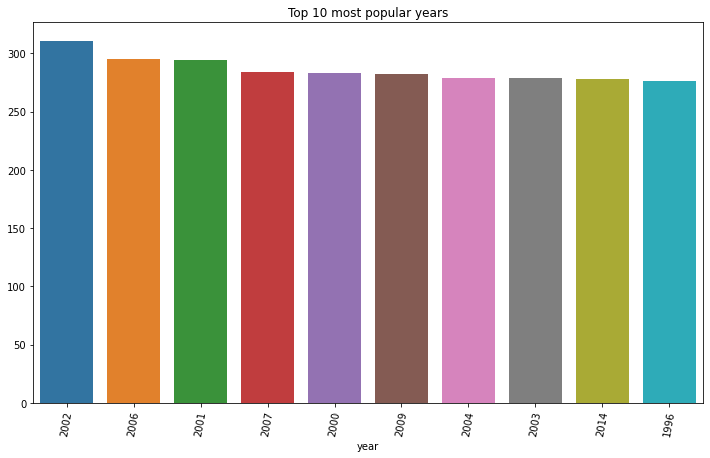

In [ ]:
plt.figure(figsize=(12,7))
topyear = movies.groupby('year').size().sort_values(ascending=False).head(10)
sns.barplot(topyear.index, topyear.values)
plt.title('Top 10 most popular years')
plt.xticks(rotation=80);

In [ ]:
ratings = ratings.merge(movies,on='movieId', how='left')
ratings



,userId,movieId,rating,timestamp,title,Avg_Rating_TMDB,Vote_Count_TMDB,year,(no genres listed),Action,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,964982703,Toy Story (1995),0.80,0.487102,1995,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,964981247,Grumpier Old Men (1995),0.65,0.009299,1995,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,6,4.0,964982224,Heat (1995),0.79,0.173599,1995,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),0.83,0.539745,1995,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",0.82,0.270987,1995,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),0.73,0.473981,2017,0,0,...,0,1,0,0,0,0,0,1,0,0
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),0.73,0.322325,2017,0,1,...,0,0,0,0,0,0,0,1,0,0
100833,610,168250,5.0,1494273047,Get Out (2017),0.76,0.447389,2017,0,0,...,0,1,0,0,0,0,0,0,0,0
100834,610,168252,5.0,1493846352,Logan (2017),0.78,0.532357,2017,0,1,...,0,0,0,0,0,0,1,0,0,0


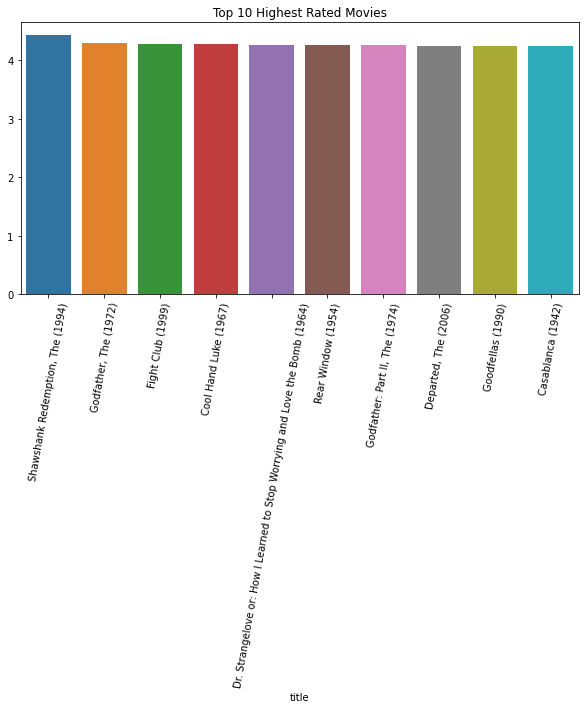

In [ ]:
plt.figure(figsize=(10,5))
ratings_movies1 = ratings.groupby('movieId').filter(lambda x: len(x)>=50)
topmovies = ratings_movies1.groupby('title').mean()['rating'].sort_values(ascending=False).head(10)
sns.barplot(topmovies.index, topmovies.values)
plt.title('Top 10 Highest Rated Movies')
plt.xticks(rotation=80);

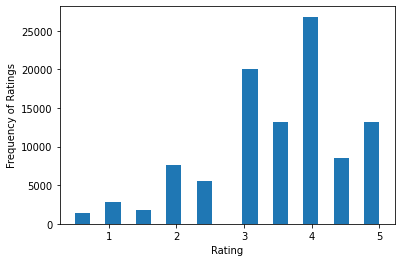

In [ ]:
plt.hist(ratings['rating'],bins=20)
plt.xlabel('Rating')
plt.ylabel('Frequency of Ratings')
plt.xticks()
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Forrest Gump (1994)'),
  Text(1, 0, 'Shawshank Redemption, The (1994)'),
  Text(2, 0, 'Pulp Fiction (1994)'),
  Text(3, 0, 'Silence of the Lambs, The (1991)'),
  Text(4, 0, 'Matrix, The (1999)'),
  Text(5, 0, 'Star Wars: Episode IV - A New Hope (1977)'),
  Text(6, 0, 'Jurassic Park (1993)'),
  Text(7, 0, 'Braveheart (1995)'),
  Text(8, 0, 'Terminator 2: Judgment Day (1991)'),
  Text(9, 0, "Schindler's List (1993)")])

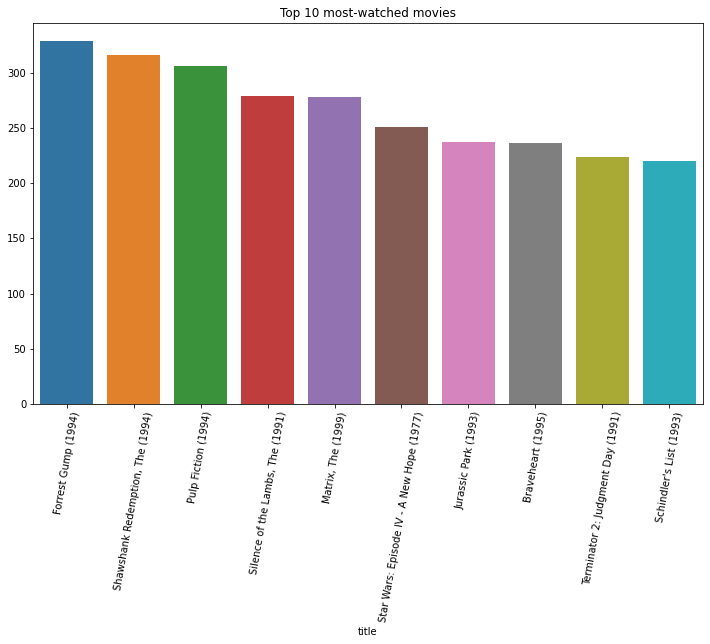

In [ ]:
plt.figure(figsize=(12,7))
topmovies = ratings.groupby('title').size().sort_values(ascending=False).head(10)
sns.barplot(topmovies.index, topmovies.values)
plt.title('Top 10 most-watched movies')
plt.xticks(rotation=80)

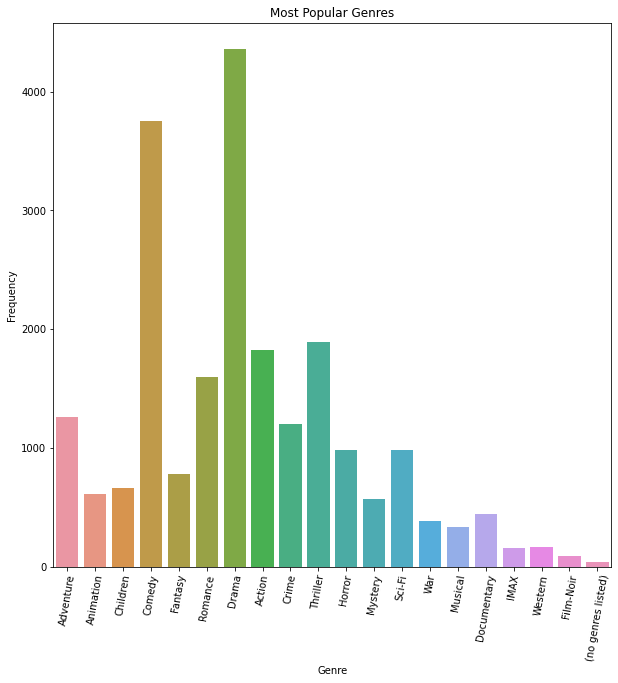

In [ ]:
genres1 = pd.DataFrame(list(genres.items()),columns = ['Genre','Frequency'])
plt.figure(figsize=(10,10))
sns.barplot(genres1['Genre'], genres1['Frequency'])
plt.title('Most Popular Genres')
plt.xticks(rotation=80);

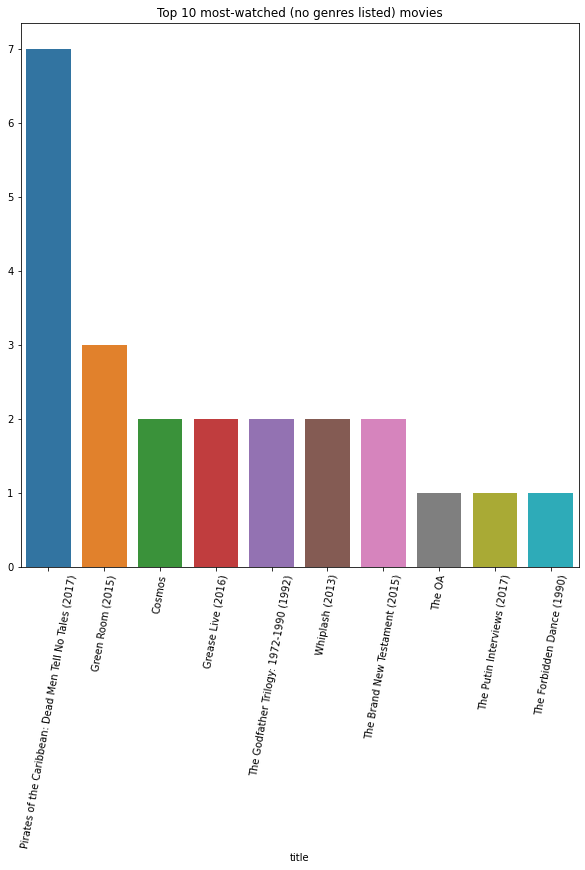

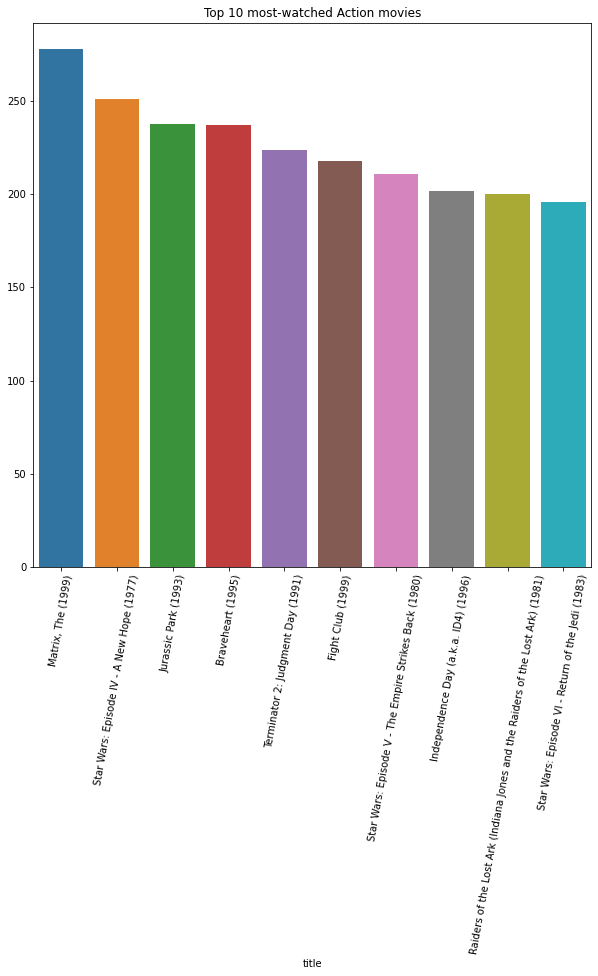

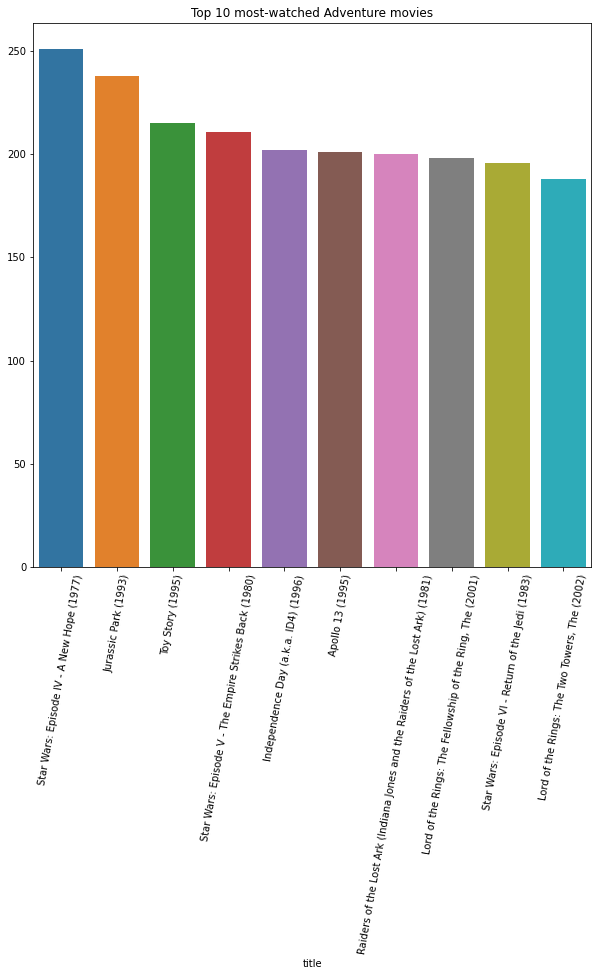

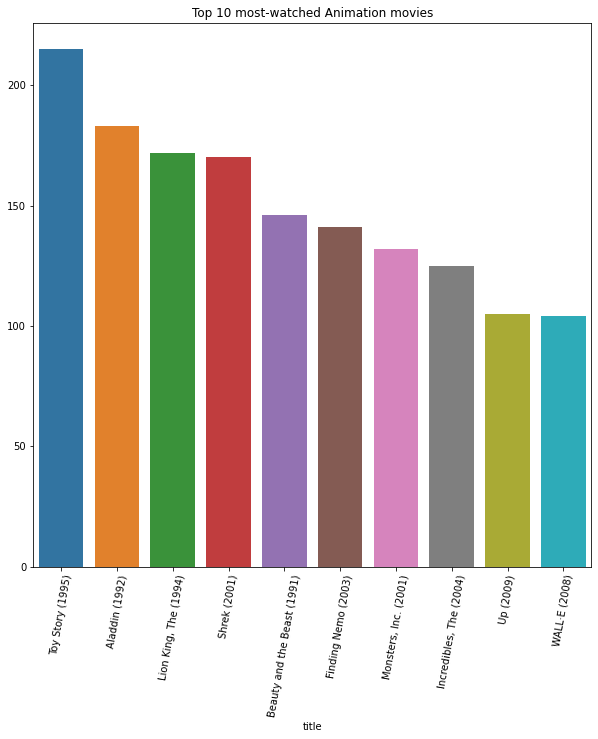

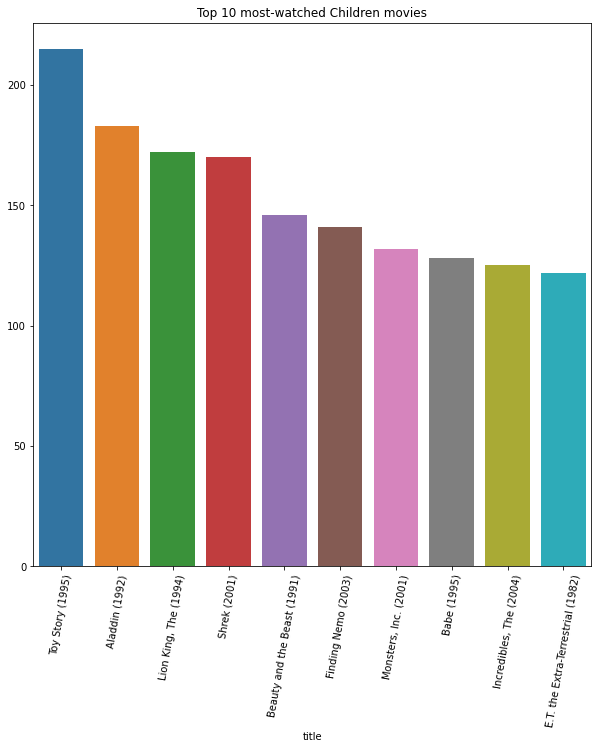

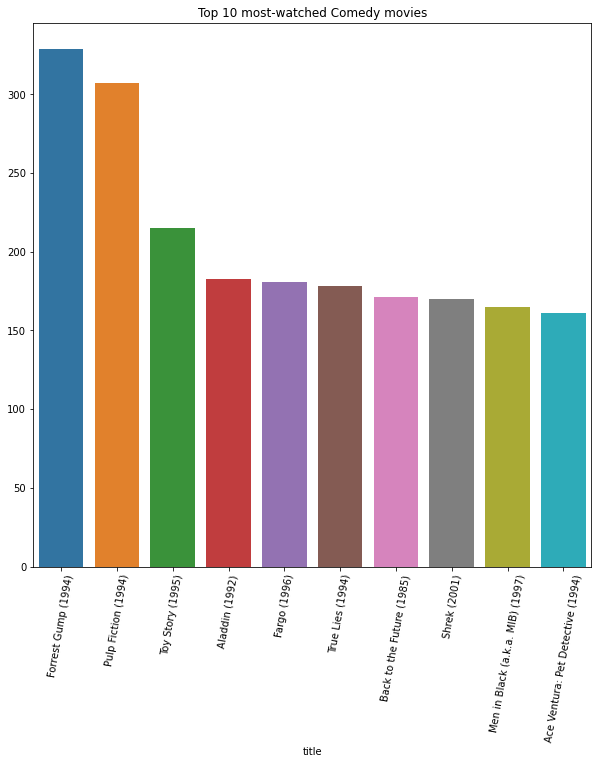

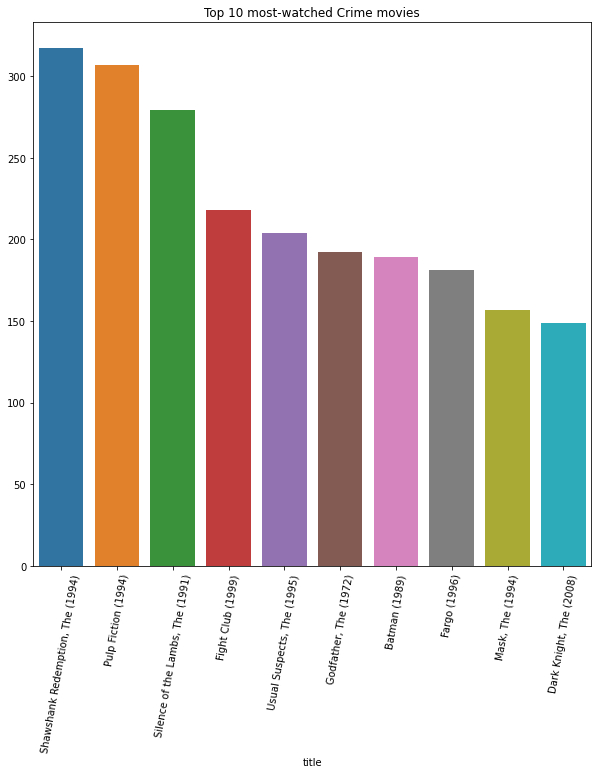

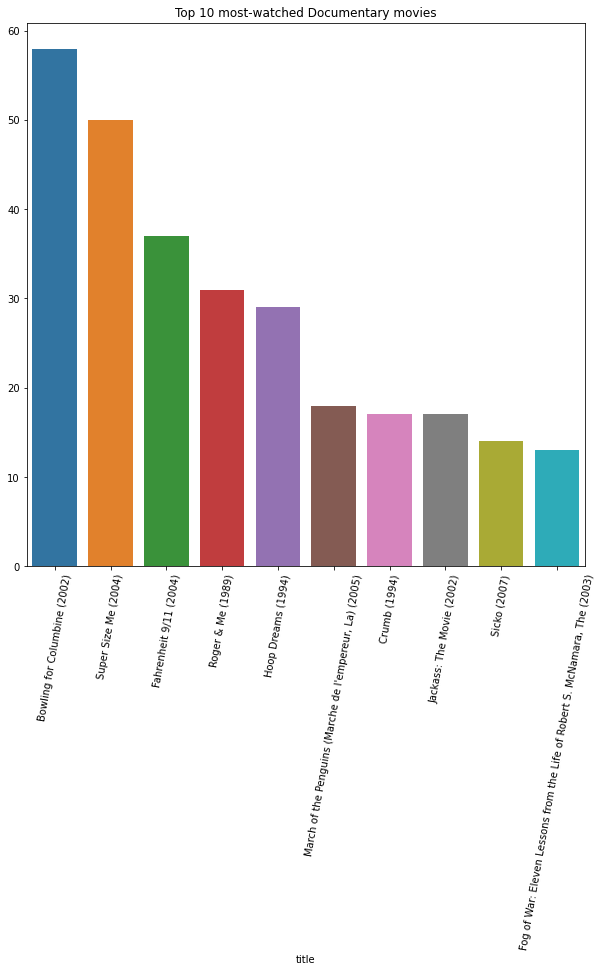

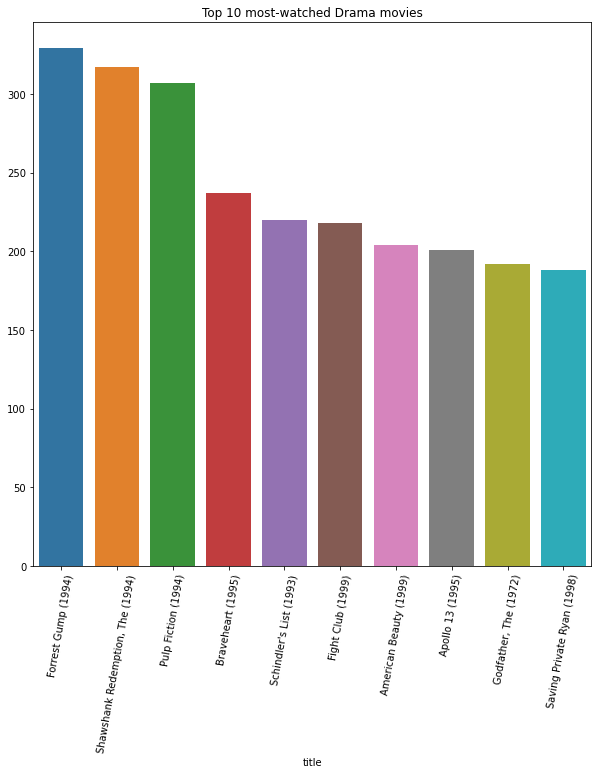

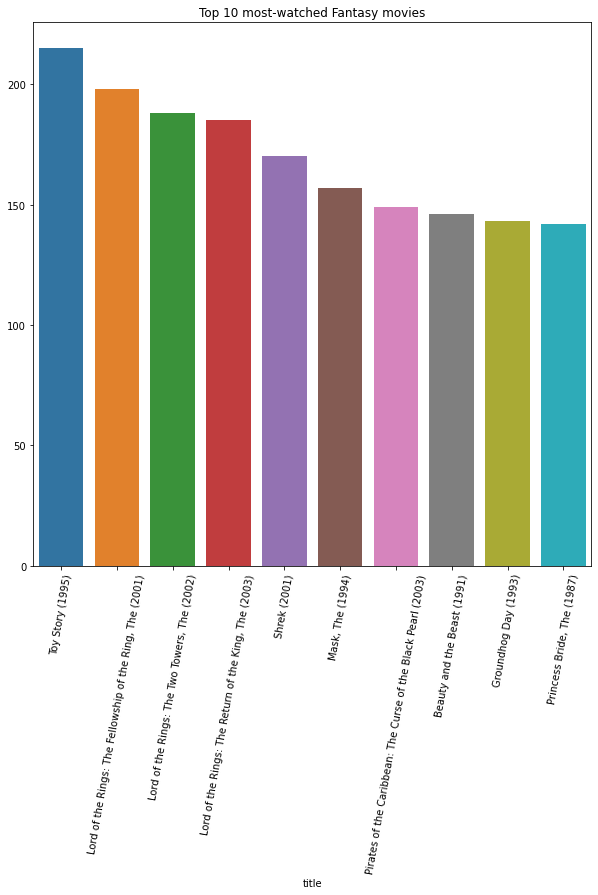

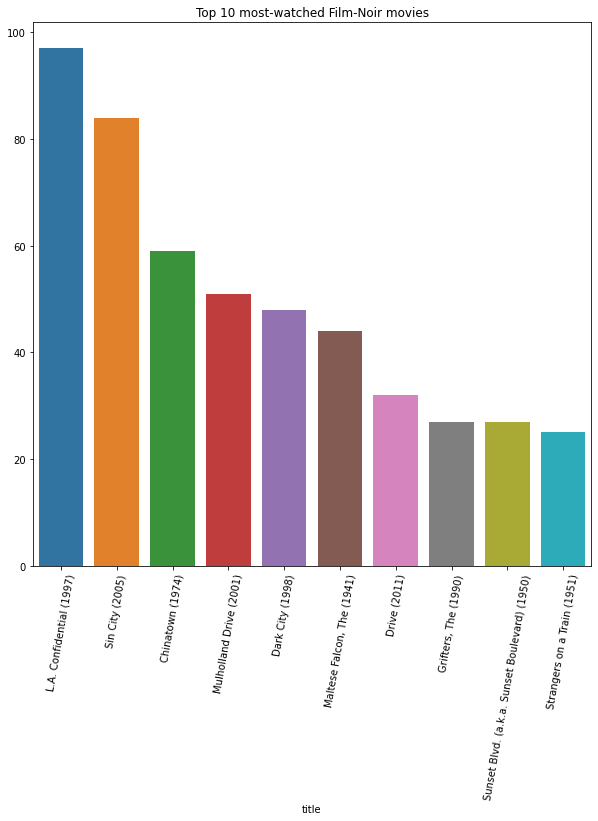

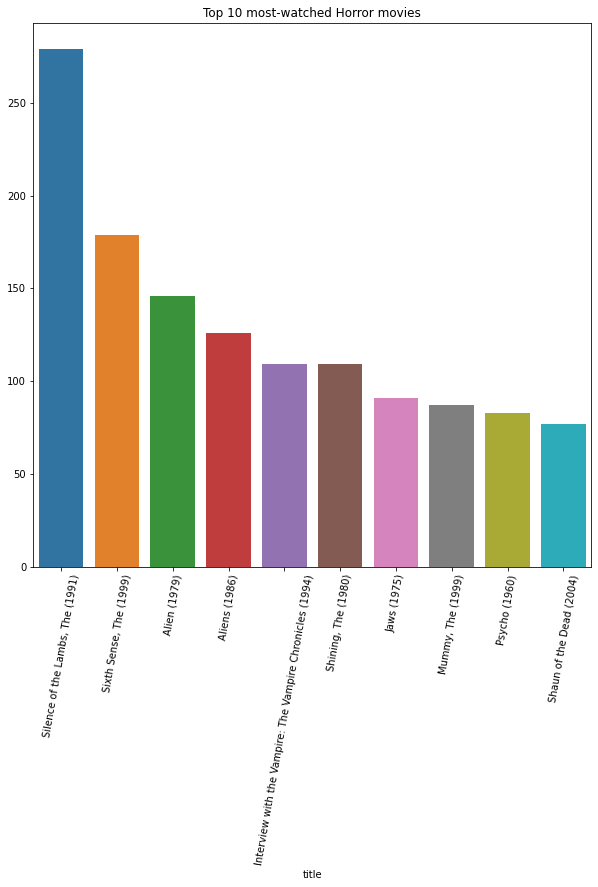

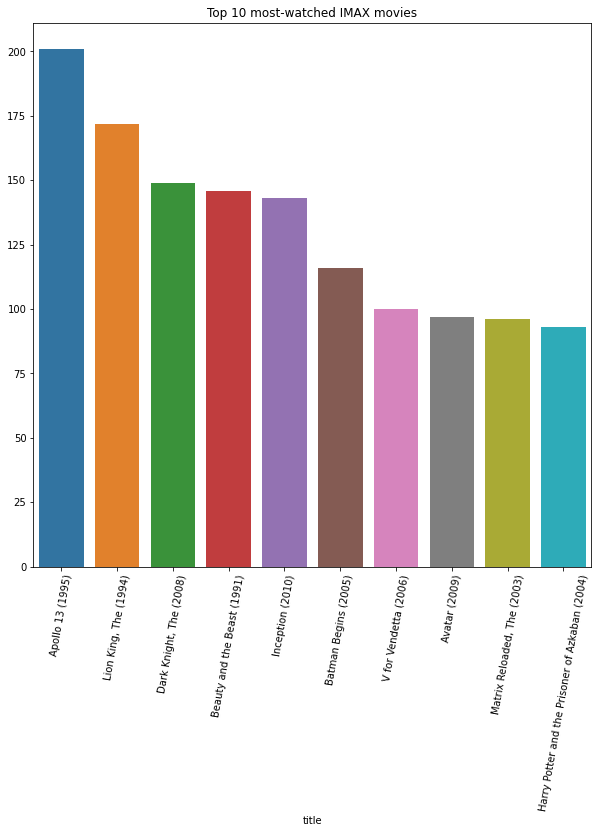

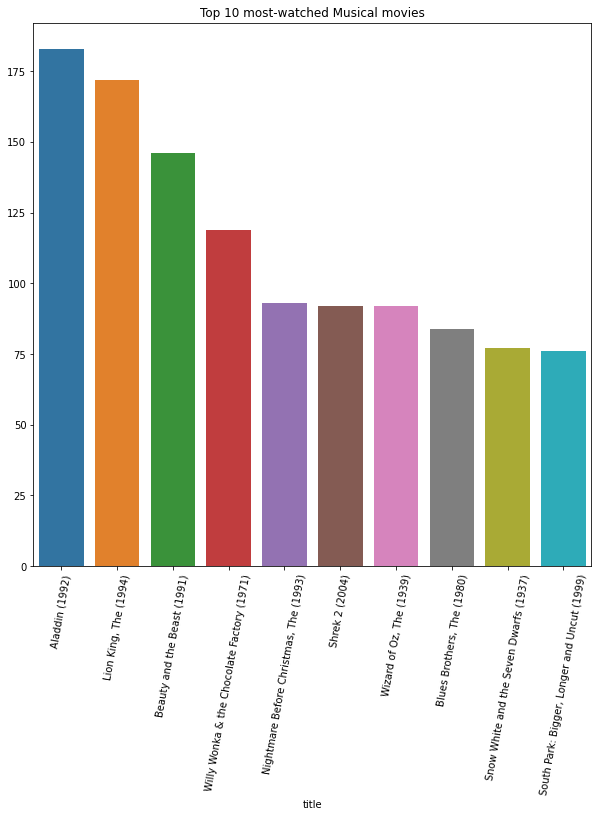

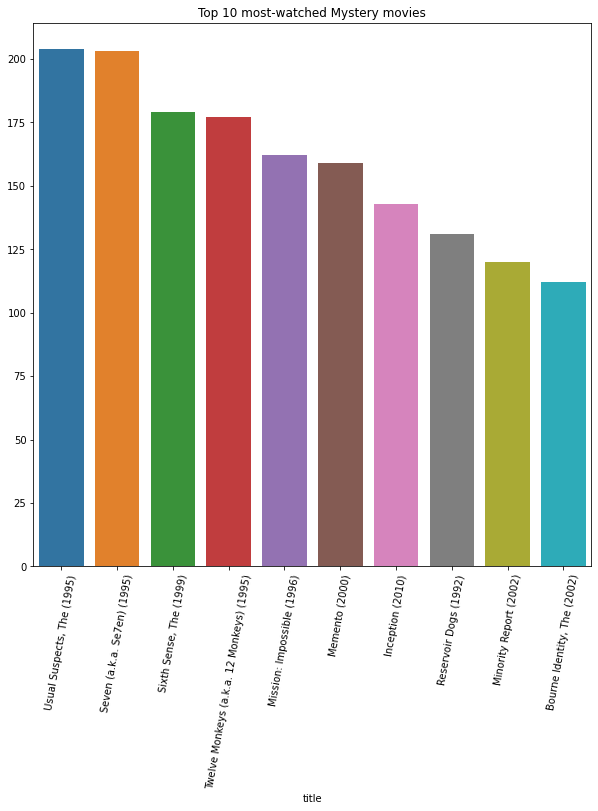

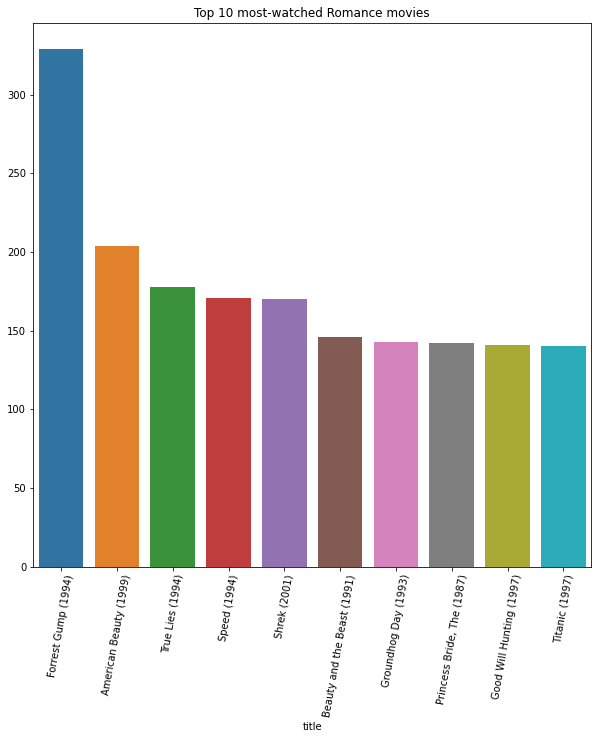

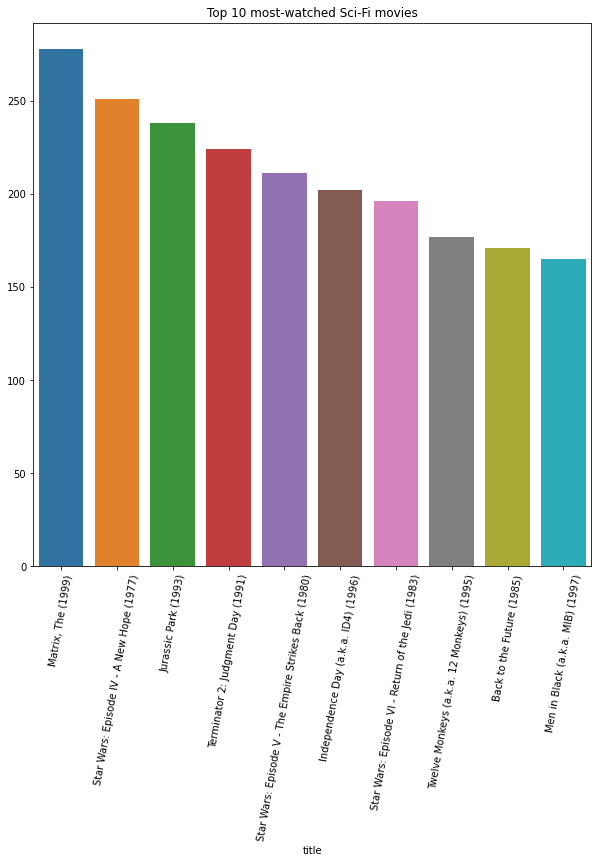

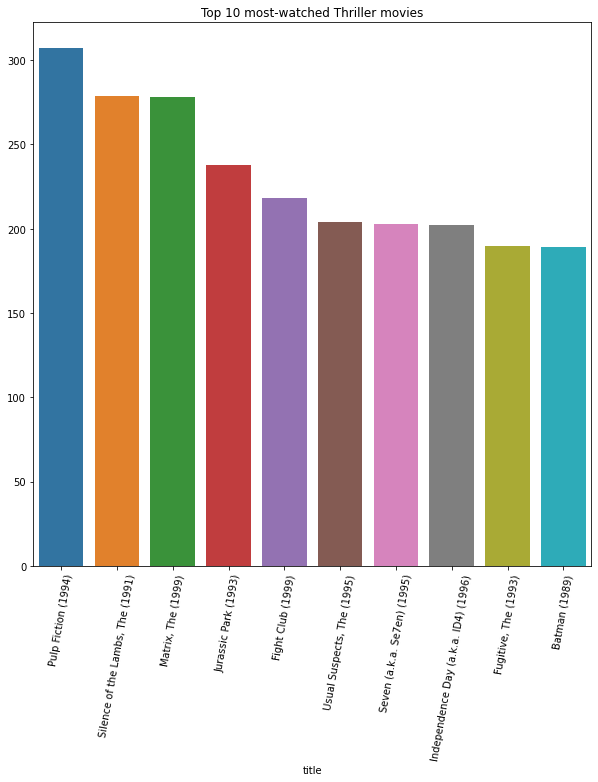

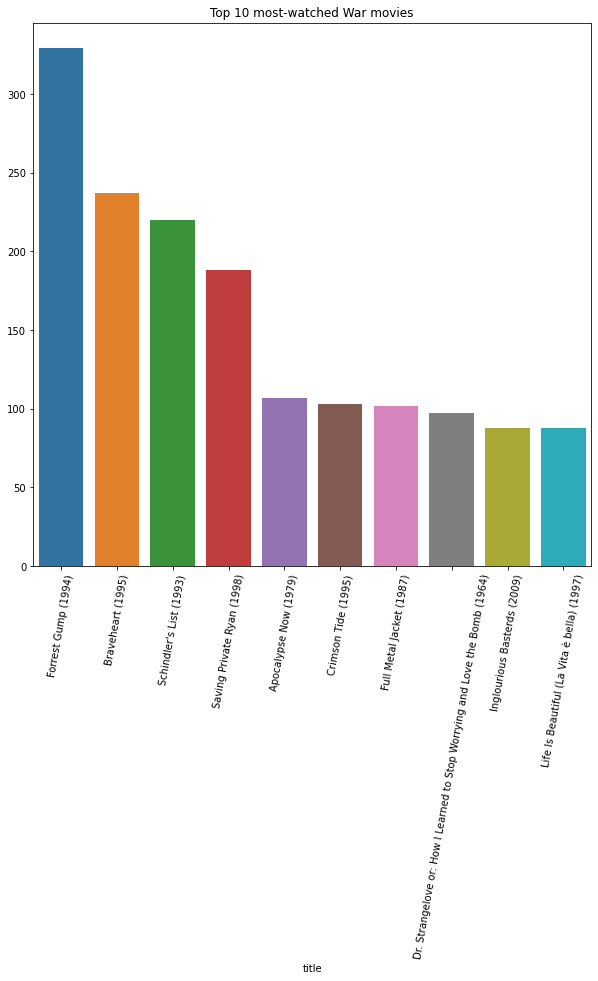

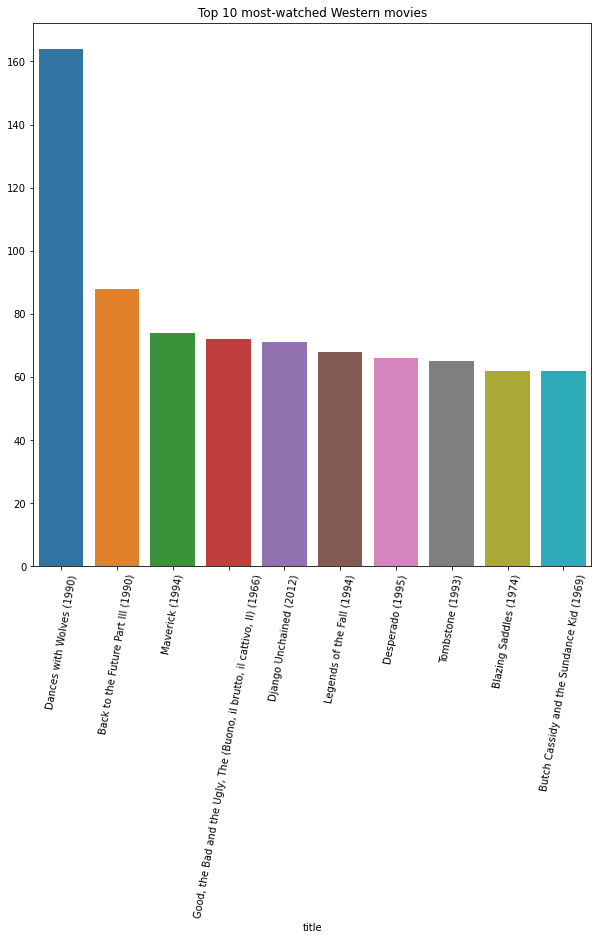

In [ ]:
matrix = ratings.drop(['userId', 'movieId', "Vote_Count_TMDB","Avg_Rating_TMDB",'rating','year','timestamp'], axis=1)

for gen in matrix.columns[1:]:
    x = ratings[(ratings[gen]==True)]
    
    plt.figure(figsize=(10,10))
    topmovies = x.groupby('title').size().sort_values(ascending=False).head(10)
    sns.barplot(topmovies.index, topmovies.values)
    plt.title('Top 10 most-watched '+gen+' movies')
    plt.xticks(rotation=80);

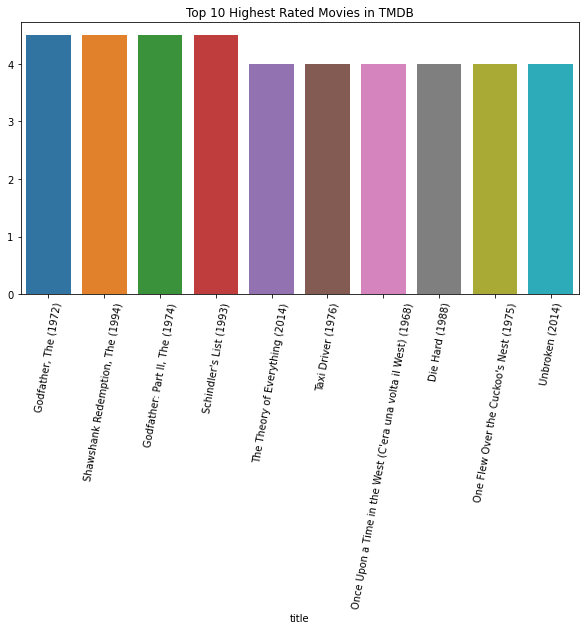

In [ ]:
plt.figure(figsize=(10,5))
#ratings2=ratings1.drop("userId",axis=1)
ratings2 = movies.sort_values(by = "Vote_Count_TMDB",ascending=False).head(1000)

ratings3= ratings2.groupby('title').mean()['Avg_Rating_TMDB'].sort_values(ascending=False).head(10)
sns.barplot(ratings3.index, ratings3.values)
plt.title('Top 10 Highest Rated Movies in TMDB')
plt.xticks(rotation=80);

Index(['Inception (2010)', 'Interstellar (2014)', 'Dark Knight, The (2008)',
       'Avengers, The (2012)', 'Deadpool (2016)', 'Avatar (2009)',
       'Avengers: Infinity War - Part I (2018)',
       'Guardians of the Galaxy (2014)', 'Fight Club (1999)',
       'Pulp Fiction (1994)'],
      dtype='object', name='title')
[1.         0.9016879  0.87146497 0.85203822 0.84754777 0.80414013
 0.77703822 0.77270701 0.76187898 0.73242038]


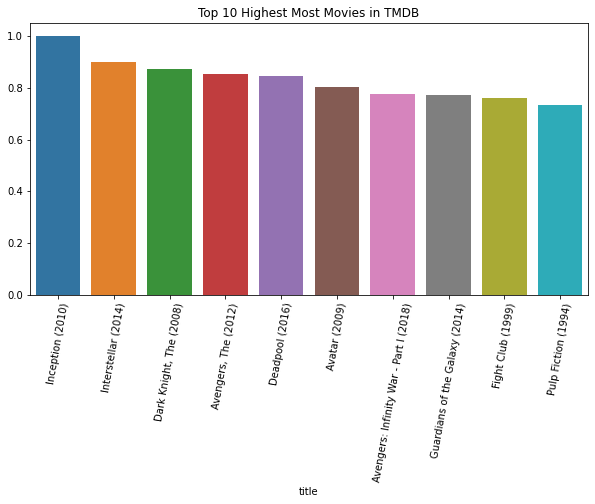

In [ ]:
plt.figure(figsize=(10,5))
#ratings2=ratings1.drop("userId",axis=1)
ratings2 = movies.sort_values(by = "Vote_Count_TMDB",ascending=False).head(1000)
ratings3 = ratings2.groupby('title').mean()['Vote_Count_TMDB'].sort_values(ascending=False).head(10)
print(ratings3.index)
print(ratings3.values)
sns.barplot(ratings3.index, ratings3.values)
plt.title('Top 10 Highest Most Movies in TMDB')
plt.xticks(rotation=80);

In [ ]:
ratings.rating.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [ ]:
movies.to_csv(r"C:\Users\yashn\Desktop\Projects\ML Project Dataset\Project\archive\movies_afterupdate.csv", index=True)
#.to_csv(r"C:\Users\yashn\Desktop\Projects\ML Project Dataset\Project\archive\test.csv", index=True)

In [ ]:
ratings.to_csv(r"C:\Users\yashn\Desktop\Projects\ML Project Dataset\Project\archive\Data_Preprocessed.csv", index=True)

In [ ]:
import numpy as np
from scipy import linalg
from sklearn.metrics import accuracy_score as ass
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor as DT
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as ltb
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
import math
from sklearn.metrics import mean_squared_error as MSE
from sklearn.neighbors import NearestNeighbors

# train = pd.read_csv("train (1).csv")
# test = pd.read_csv("test (1).csv")

In [ ]:
# x = train.iloc[:,3]
# print(x)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100226 entries, 0 to 100225
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          100226 non-null  int64  
 1   userId              100226 non-null  int64  
 2   movieId             100226 non-null  int64  
 3   rating              100226 non-null  float64
 4   timestamp           100226 non-null  int64  
 5   title               100226 non-null  object 
 6   Avg_Rating_TMDB     100226 non-null  float64
 7   Vote_Count_TMDB     100226 non-null  float64
 8   year                100209 non-null  object 
 9   (no genres listed)  100226 non-null  int64  
 10  Action              100226 non-null  int64  
 11  Adventure           100226 non-null  int64  
 12  Animation           100226 non-null  int64  
 13  Children            100226 non-null  int64  
 14  Comedy              100226 non-null  int64  
 15  Crime               100226 non-nul

In [ ]:
# train
# test
train1 = train.drop(["timestamp","Unnamed: 0","title","year"],axis=1)
test1 = test.drop(["timestamp","Unnamed: 0","title","year"],axis=1)

x_train = train1.drop(["rating"],axis=1)
y_train = train1.iloc[:,2]

x_test = test1.drop(["rating"],axis=1)
y_test = test1.iloc[:,2]

In [ ]:
y_train.iloc[:,2]

In [ ]:
model1 = XGBRegressor()
# model2 = RandomForestRegressor()
# model3 = BaggingRegressor()
# model4 = ltb()

In [ ]:
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)
acc = MSE(y_test,y_pred)

[19:32:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
print(acc) 
print(y_pred)
y_pred = np.array(y_pred)

1.094346086191073
[3.9209287 3.6355932 3.4167922 3.4745898 3.4961307 3.495067  3.4841633
 3.4880047 2.5467472 3.4815989 3.5022829 3.5022829 2.8483884 3.0810661
 3.068974  3.9612114 3.979742  3.5171263 2.798714  3.0239074 3.4917412
 3.2630217 3.639377  3.2962089 3.569946  3.8148072 2.9540987 3.483771
 3.65619   3.825912  2.8659875 3.6271489 3.5030346 3.5882225 3.2883625
 4.2441416 3.9488912 3.5118992 3.5882225 3.493847  3.255935  3.764154
 3.606836  3.6233075 3.6416047 3.5793881 3.8240469 3.92711   3.784553
 3.921861  2.6951857 3.3560193 3.4025042 3.636452  3.6641085 3.309201
 2.6823196 3.830779  3.6850471 4.051709  4.1014094 4.016988  4.051709
 3.5180783 3.6465926 3.9666698 3.6072762 3.4913871 3.954288  4.0668573
 3.6341228 4.055126  3.6469135 3.3241901 4.0749407 3.1654584 3.6370397
 3.6341202 4.0187397 3.6295214 3.9835415 3.422246  3.8598442 3.5364497
 3.7270682 3.6558676 3.6341202 3.9852545 3.1536083 3.7482882 3.3382616
 3.698328  4.0702057 3.5661168 3.6778395 3.316768  3.6023998 3.6

In [ ]:
x = np.argmax(y_pred) 
s = train

# Model-1 : Simple Recommender, Generalized for everybody

The idea behind this model is that movies that are more popular and critically acclaimed ill have a higher probability of being liked by users and thus does not give personalized recommendations.

Installing Surprise Library

In [ ]:
pip install surprise

Installing all other necessary Libraries and ignoring warnings

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from surprise import Reader, Dataset, SVD

import warnings; warnings.simplefilter('ignore')


In [ ]:
md = pd. read_csv('movies_metadata.csv')
md.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
md['genres'] = md['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [ ]:
vote_counts = md[md['vote_count'].notnull()]['vote_count'].astype('float')
vote_averages = md[md['vote_average'].notnull()]['vote_average'].astype('float')
C = vote_averages.mean()
C

5.71470538243605

In [ ]:
m = vote_counts.quantile(0.95)
m

546.0

In [ ]:
md['year'] = pd.to_datetime(md['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
# md['year'] = md['title'].str.extract('.*\((.*)\).*',expand = False)

In [ ]:
qualified = md[(md['vote_count'] >= m) & (md['vote_count'].notnull()) & (md['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]
qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('int')
qualified.shape

(1767, 6)

In [ ]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
qualified['wr'] = qualified.apply(weighted_rating, axis=1)
qualified = qualified.sort_values('wr', ascending=False).head(250)

qualified.head(15)

,title,year,vote_count,vote_average,popularity,genres,wr
15480,Inception,2010,14075,8,29.108149,"[Action, Thriller, Science Fiction, Mystery, A...",7.914659
12481,The Dark Knight,2008,12269,8,123.167259,"[Drama, Action, Crime, Thriller]",7.902632
22879,Interstellar,2014,11187,8,32.213481,"[Adventure, Drama, Science Fiction]",7.893653
2843,Fight Club,1999,9678,8,63.869599,[Drama],7.877957
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.070725,"[Adventure, Fantasy, Action]",7.867793
292,Pulp Fiction,1994,8670,8,140.950236,"[Thriller, Crime]",7.864608
314,The Shawshank Redemption,1994,8358,8,51.645403,"[Drama, Crime]",7.859864
7000,The Lord of the Rings: The Return of the King,2003,8226,8,29.324358,"[Adventure, Fantasy, Action]",7.857755
351,Forrest Gump,1994,8147,8,48.307194,"[Comedy, Drama, Romance]",7.856463
5814,The Lord of the Rings: The Two Towers,2002,7641,8,29.423537,"[Adventure, Fantasy, Action]",7.847591


In [ ]:
s = md.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_md = md.drop('genres', axis=1).join(s)

In [ ]:
def build_chart(genre, percentile=0.85):
    df = gen_md[gen_md['genre'] == genre]
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)
    
    qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity']]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    
    qualified['wr'] = qualified.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(250)
    
    return qualified

In [ ]:
build_chart('Romance').head(15)

,title,year,vote_count,vote_average,popularity,wr
10309,Dilwale Dulhania Le Jayenge,1995,661,9,34.457024,8.482387
351,Forrest Gump,1994,8147,8,48.307194,7.965200
876,Vertigo,1958,1162,8,18.208220,7.774600
883,Some Like It Hot,1959,835,8,11.845107,7.696880
1132,Cinema Paradiso,1988,834,8,14.177005,7.696560
19901,Paperman,2012,734,8,7.198633,7.660750
882,The Apartment,1960,498,8,11.994281,7.529788
3189,City Lights,1931,444,8,10.891524,7.484231
24886,The Way He Looks,2014,262,8,5.711274,7.234144
1639,Titanic,1997,7770,7,26.889070,6.977914


# Model-2 : Collaborative Filtering

The fundamental assumption for this method is that a user gives similar ratings to similar movies. When we predict a rating for a movie by a user, it is reasonable to use the average of ratings for the similar movies by the user

Loading dataset

In [ ]:
# train = pd.read_csv("train (2).csv")
# test = pd.read_csv("test (2).csv")

ratings = pd.read_csv('train (2).csv', usecols=['userId','movieId','rating'])
movies = pd.read_csv('test (2).csv', usecols=['movieId','title'])
ratings2 = pd.merge(ratings, movies, how='inner', on='movieId')

In [ ]:
ratings

,userId,movieId,rating
0,1,2012,4.0
1,1,2478,4.0
2,1,553,5.0
3,1,1445,3.0
4,1,157,5.0
...,...,...,...
100221,610,3623,3.0
100222,610,7163,1.5
100223,610,1573,3.5
100224,610,2959,5.0


In [ ]:
ratings.head()

,userId,movieId,rating
0,1,2012,4.0
1,1,2478,4.0
2,1,553,5.0
3,1,1445,3.0
4,1,157,5.0


In [ ]:
movies.head()

,movieId,title
0,2492,20 Dates (1998)
1,80489,"Town, The (2010)"
2,2424,You've Got Mail (1998)
3,4246,Bridget Jones's Diary (2001)
4,474,In the Line of Fire (1993)


Refilling the nan values with 0

In [ ]:
df = ratings2.pivot_table(index='title',columns='userId',values='rating').fillna(0)
df1 = df.copy()

Visualization

In [ ]:
df

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
10 Cloverfield Lane (2016),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
101 Dalmatians (1996),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
102 Dalmatians (2000),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13 Going on 30 (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You've Got Mail (1998),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0
Young Frankenstein (1974),5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0
Zombieland (2009),0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5


In [ ]:
from google.colab import files
df.to_csv("data.csv", index=True)
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

This function basically shows the movies atched by the user in past based on which we will make our prediction

In [ ]:
def recommend_movies(user, num_recommended_movies):

  print('The list of the Movies {} Has Watched \n'.format(user))

  for m in df[df[user] > 0][user].index.tolist():
    print(m)
  
  print('\n')

  recommended_movies = []
  
  for m in df[df[user] == 0].index.tolist():

    index_df = df.index.tolist().index(m)
    predicted_rating = df1.iloc[index_df, df1.columns.tolist().index(user)]
    recommended_movies.append((m, predicted_rating))

  sorted_rm = sorted(recommended_movies, key=lambda x:x[1], reverse=True)
  
  print('The list of the Recommended Movies \n')
  rank = 1
  for recommended_movie in sorted_rm[:num_recommended_movies]:
    
    print('{}: {} - predicted rating:{}'.format(rank, recommended_movie[0], recommended_movie[1]))
    rank = rank + 1

Here we use the Cosine Similarity to find the releated movies using Knn. predicting the rating of a user is basically equivalent to finding the weighted average of ratings of all releated movies    

In [ ]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(metric='cosine', algorithm='brute')

def movie_recommender(user, num_neighbors, num_recommendation):
  
  number_neighbors = num_neighbors
  
  knn.fit(df.values)
  
  distances, indices = knn.kneighbors(df.values, n_neighbors=number_neighbors)

  user_index = df.columns.tolist().index(user)

  for m,t in list(enumerate(df.index)):
    if df.iloc[m, user_index] == 0:
      sim_movies = indices[m].tolist()
      movie_distances = distances[m].tolist()
    
      if m in sim_movies:
        id_movie = sim_movies.index(m)
        sim_movies.remove(m)
        movie_distances.pop(id_movie) 

      else:
        sim_movies = sim_movies[:num_neighbors-1]
        movie_distances = movie_distances[:num_neighbors-1]
           
      movie_similarity = [1-x for x in movie_distances]
      movie_similarity_copy = movie_similarity.copy()
      nominator = 0

      for s in range(0, len(movie_similarity)):
        if df.iloc[sim_movies[s], user_index] == 0:
          if len(movie_similarity_copy) == (number_neighbors - 1):
            movie_similarity_copy.pop(s)
          
          else:
            movie_similarity_copy.pop(s-(len(movie_similarity)-len(movie_similarity_copy)))
            
        else:
          nominator = nominator + movie_similarity[s]*df.iloc[sim_movies[s],user_index]
          
      if len(movie_similarity_copy) > 0:
        if sum(movie_similarity_copy) > 0:
          predicted_r = nominator/sum(movie_similarity_copy)
        
        else:
          predicted_r = 0
      else:
        predicted_r = 0
        
      df1.iloc[m,user_index] = predicted_r
  recommend_movies(user,num_recommendation)

Fixing the number of releated movies to be considered for predicting the rating or the number of neighbours in KNN algorithm

In [ ]:
a = 10

The output

In [ ]:
movie_recommender(200,a,20)
# first n third are input argunments, userId and number of recommendations needed!

The list of the Movies 200 Has Watched 

101 Dalmatians (1996)
13 Going on 30 (2004)
27 Dresses (2008)
Ace Ventura: When Nature Calls (1995)
Across the Universe (2007)
Air Force One (1997)
Alien (1979)
Almost Famous (2000)
America's Sweethearts (2001)
Anchorman: The Legend of Ron Burgundy (2004)
Babe (1995)
Back to the Future (1985)
Back to the Future Part III (1990)
Beautiful Mind, A (2001)
Before Sunset (2004)
Best in Show (2000)
Blood Diamond (2006)
Bourne Supremacy, The (2004)
Bourne Ultimatum, The (2007)
Braveheart (1995)
Bridge on the River Kwai, The (1957)
Bridget Jones's Diary (2001)
Brokeback Mountain (2005)
Casino Royale (2006)
Cast Away (2000)
Clueless (1995)
Coneheads (1993)
Corpse Bride (2005)
Dances with Wolves (1990)
Dark Knight, The (2008)
Die Another Day (2002)
Die Hard (1988)
Dirty Dancing (1987)
Donnie Darko (2001)
Dude, Where's My Car? (2000)
Edward Scissorhands (1990)
Eternal Sunshine of the Spotless Mind (2004)
Father of the Bride Part II (1995)
Forrest Gump (1994

In [ ]:
# userId, num_neighbors(using cosine formula), num_recommendation

# Model-3 : Content Based Recommender

This model basically aims to give user all the releated movies using the content provided as recommendation

In [ ]:
links_small = pd.read_csv('links_small.csv')
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')

Dropping unnecessary columns

In [ ]:
md = md.drop([19730, 29503])

In [ ]:
md['id'] = md['id'].astype('int')

In [ ]:
smd = md[md['id'].isin(links_small)]
smd.shape

(9027, 25)

The content we use to filter movies are choosed here as "tagline" and "overview"

In [ ]:
smd['tagline'] = smd['tagline'].fillna('')
smd['description'] = smd['overview'] + smd['tagline']
smd['description'] = smd['description'].fillna('')

In [ ]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(smd['description'])

In [ ]:
tfidf_matrix.shape

(9027, 266643)

In [ ]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
cosine_sim[0]

array([1.        , 0.00679585, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [ ]:
smd = smd.reset_index()
titles = smd['title']
indices = pd.Series(smd.index, index=smd['title'])

In [ ]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

The output, Top-10 most releated movies

In [ ]:
get_recommendations('The Godfather').head(10)

973      The Godfather: Part II
8387                 The Family
3509                       Made
4196         Johnny Dangerously
29               Shanghai Triad
5667                       Fury
2412             American Movie
1582    The Godfather: Part III
4221                    8 Women
2159              Summer of Sam
Name: title, dtype: object

In [ ]:
get_recommendations('The Dark Knight').head(10)

7931                      The Dark Knight Rises
132                              Batman Forever
1113                             Batman Returns
8227    Batman: The Dark Knight Returns, Part 2
7565                 Batman: Under the Red Hood
524                                      Batman
7901                           Batman: Year One
2579               Batman: Mask of the Phantasm
2696                                        JFK
8165    Batman: The Dark Knight Returns, Part 1
Name: title, dtype: object

# Model 4: Using Embedding & Deep Learning

###Splitting the data into Train, Test And CV Sets

In [ ]:
def split_data(data,test_entries):
  k=np.unique(data['userId'].values)
  columns = data.columns
  train_set = []
  test_set  = []
  for i in k:
    df_new = data[data['userId'] == i]
    df_new = df_new.sort_values(by = 'timestamp', ascending = False).values
    for j in range(test_entries):
      test_set.append(df_new[j])
    for j in range(test_entries,len(df_new)):
      train_set.append(df_new[j])
  train_set=pd.DataFrame(train_set, columns = columns)
  test_set=pd.DataFrame(test_set, columns = columns)
  return train_set,test_set

X_train,X_test = split_data(ratings, 3)
X_train,X_cv = split_data(X_train, 2)


X_train

,userId,movieId,rating,timestamp,title,Avg_Rating_TMDB,Vote_Count_TMDB,year,(no genres listed),Action,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,157,5.0,964984100,Canadian Bacon (1995),0.58,0.005223,1995,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,780,3.0,964984086,Independence Day (a.k.a. ID4) (1996),0.68,0.254236,1996,0,1,...,0,0,0,0,0,0,1,1,0,0
2,1,3053,5.0,964984086,"Messenger: The Story of Joan of Arc, The (1999)",0.63,0.036369,1999,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1298,5.0,964984086,Pink Floyd: The Wall (1982),0.80,0.037293,1982,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,3448,5.0,964984054,"Good Morning, Vietnam (1987)",0.74,0.066433,1987,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97781,610,3623,3.0,1479542001,Mission: Impossible II (2000),0.61,0.167420,2000,0,1,...,0,0,0,0,0,0,0,1,0,0
97782,610,7163,1.5,1479541995,Paycheck (2003),0.62,0.045987,2003,0,1,...,0,0,0,0,0,0,1,1,0,0
97783,610,1573,3.5,1479541990,Face/Off (1997),0.70,0.133599,1997,0,1,...,0,0,0,0,0,0,0,1,0,0
97784,610,2959,5.0,1479541966,Fight Club (1999),0.84,0.761879,1999,0,1,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
Y_train = X_train['rating']
Y_cv = X_cv['rating']
Y_test = X_test['rating']
X_train = X_train.drop(["title","timestamp","rating",'year'],axis=1)
X_cv = X_cv.drop(["title","timestamp","rating",'year'],axis=1)
X_test = X_test.drop(["title","timestamp","rating",'year'],axis=1)
#X_train=np.asarray(X_train).astype('float32')
#X_train=np.asarray(Y_train).astype('float32')
#X_cv=np.asarray(X_cv).astype('float32')
#Y_cv=np.asarray(Y_cv).astype('float32')

#X_train = X_train[['userId','movieId','Avg_Rating_TMDB','Vote_Count_TMDB']]
#X_cv = X_cv[['userId','movieId','Avg_Rating_TMDB','Vote_Count_TMDB']]
#X_test = X_test[['userId','movieId','Avg_Rating_TMDB','Vote_Count_TMDB']]

In [ ]:
np.shape(X_train),np.shape(X_cv)

((97786, 24), (1220, 24))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow.python.ops.numpy_ops.np_config as np_config
            
EMBEDDING_SIZE = 26

class CFModel(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(CFModel, self).__init__(**kwargs)
        self.hidden_units_tmdb = 3
        self.hidden_units_tm = 3
        self.num_users = num_users
        self.num_movies = num_movies
        self.tmdb_ratings = num_movies
        self.tmdb_count = num_movies
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.movie_bias = layers.Embedding(num_movies, 1)
        self.tmdb_rating_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.tmdb_rating_bias = layers.Embedding(num_movies, 1)
        self.tmdb_count_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.tmdb_count_bias = layers.Embedding(num_movies, 1)

        self.genre1_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.genre1_bias = layers.Embedding(num_movies, 1)

        self.genre2_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.genre2_bias = layers.Embedding(num_movies, 1)

        self.genre3_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.genre3_bias = layers.Embedding(num_movies, 1)

        self.genre4_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.genre4_bias = layers.Embedding(num_movies, 1)

        self.genre5_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.genre5_bias = layers.Embedding(num_movies, 1)

        self.genre6_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.genre6_bias = layers.Embedding(num_movies, 1)

        self.genre6_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.genre6_bias = layers.Embedding(num_movies, 1)

        self.genre7_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.genre7_bias = layers.Embedding(num_movies, 1)

        self.genre8_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.genre8_bias = layers.Embedding(num_movies, 1)

        self.genre9_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.genre9_bias = layers.Embedding(num_movies, 1)

        self.genre10_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.genre10_bias = layers.Embedding(num_movies, 1)

        self.genre11_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.genre11_bias = layers.Embedding(num_movies, 1)

        self.genre12_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.genre12_bias = layers.Embedding(num_movies, 1)

        self.genre13_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.genre13_bias = layers.Embedding(num_movies, 1)

        self.genre14_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.genre14_bias = layers.Embedding(num_movies, 1)

        self.genre15_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.genre15_bias = layers.Embedding(num_movies, 1)

        self.genre16_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.genre16_bias = layers.Embedding(num_movies, 1)

        self.genre17_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.genre17_bias = layers.Embedding(num_movies, 1)

        self.genre18_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.genre18_bias = layers.Embedding(num_movies, 1)

        self.genre19_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.genre19_bias = layers.Embedding(num_movies, 1)

        self.genre20_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-3),
        )
        self.genre20_bias = layers.Embedding(num_movies, 1)
       
        self.out = keras.layers.Flatten()
        self.out1 = keras.layers.Dense(10, activation='sigmoid')
        self.out_tmdb = layers.Dense(1, activation='sigmoid')

        self.out2 = keras.layers.Flatten()
        self.out3 = keras.layers.Dense(10, activation='sigmoid')
        self.out_user_movie = layers.Dense(1, activation='sigmoid')
        

        
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])

        tmdb_rating_vector = self.tmdb_rating_embedding(inputs[:, 2])
        tmdb_rating_bias = self.tmdb_rating_bias(inputs[:, 2])
        tmdb_count_vector = self.tmdb_count_embedding(inputs[:, 3])
        tmdb_count_bias = self.tmdb_count_bias(inputs[:, 3])
        
        genre1_vector = self.genre1_embedding(inputs[: , 4])
        genre1_bias = self.genre1_bias(inputs[: , 4])

        genre2_vector = self.genre1_embedding(inputs[: , 5])
        genre2_bias = self.genre1_bias(inputs[: , 5])

        genre3_vector = self.genre1_embedding(inputs[: , 6])
        genre3_bias = self.genre1_bias(inputs[: , 6])

        genre4_vector = self.genre1_embedding(inputs[: , 7])
        genre4_bias = self.genre1_bias(inputs[: , 7])

        genre5_vector = self.genre1_embedding(inputs[: , 8])
        genre5_bias = self.genre1_bias(inputs[: , 8])

        genre6_vector = self.genre1_embedding(inputs[: , 9])
        genre6_bias = self.genre1_bias(inputs[: , 9])

        genre7_vector = self.genre1_embedding(inputs[: , 10])
        genre7_bias = self.genre1_bias(inputs[: , 10])

        genre8_vector = self.genre1_embedding(inputs[: , 11])
        genre8_bias = self.genre1_bias(inputs[: , 11])

        genre9_vector = self.genre1_embedding(inputs[: , 12])
        genre9_bias = self.genre1_bias(inputs[: , 12])

        genre10_vector = self.genre1_embedding(inputs[: , 13])
        genre10_bias = self.genre1_bias(inputs[: , 13])

        genre11_vector = self.genre1_embedding(inputs[: , 14])
        genre11_bias = self.genre1_bias(inputs[: , 14])

        genre12_vector = self.genre1_embedding(inputs[: , 15])
        genre12_bias = self.genre1_bias(inputs[: , 15])

        genre13_vector = self.genre1_embedding(inputs[: , 16])
        genre13_bias = self.genre1_bias(inputs[: , 16])

        genre14_vector = self.genre1_embedding(inputs[: , 17])
        genre14_bias = self.genre1_bias(inputs[: , 17])

        genre15_vector = self.genre1_embedding(inputs[: , 18])
        genre15_bias = self.genre1_bias(inputs[: , 18])

        genre16_vector = self.genre1_embedding(inputs[: , 19])
        genre16_bias = self.genre1_bias(inputs[: , 19])

        genre17_vector = self.genre1_embedding(inputs[: , 20])
        genre17_bias = self.genre1_bias(inputs[: , 20])

        genre18_vector = self.genre1_embedding(inputs[: , 21])
        genre18_bias = self.genre1_bias(inputs[: , 21])

        genre19_vector = self.genre1_embedding(inputs[: , 22])
        genre19_bias = self.genre1_bias(inputs[: , 22])

        genre20_vector = self.genre1_embedding(inputs[: , 23])
        genre20_bias = self.genre1_bias(inputs[: , 23])

        w = 0
        dot1 = tf.tensordot(genre1_vector, genre1_vector,  2) + genre1_bias
        dot2 = tf.tensordot(genre2_vector, genre2_vector,  2) + genre2_bias
        dot3 = tf.tensordot(genre3_vector, genre3_vector,  2) + genre3_bias
        dot4 = tf.tensordot(genre4_vector, genre4_vector,  2) + genre4_bias
        dot5 = tf.tensordot(genre5_vector, genre5_vector,  2) + genre5_bias
        dot6 = tf.tensordot(genre6_vector, genre6_vector,  2) + genre6_bias
        dot7 = tf.tensordot(genre7_vector, genre7_vector,  2) + genre7_bias
        dot8 = tf.tensordot(genre8_vector, genre8_vector,  2) + genre8_bias
        dot9 = tf.tensordot(genre9_vector, genre9_vector,  2) + genre9_bias
        dot10 = tf.tensordot(genre10_vector, genre10_vector,  2) + genre10_bias
        dot11 = tf.tensordot(genre11_vector, genre11_vector,  2) + genre11_bias
        dot12 = tf.tensordot(genre12_vector, genre12_vector,  2) + genre12_bias
        dot13 = tf.tensordot(genre13_vector, genre13_vector,  2) + genre13_bias
        dot14 = tf.tensordot(genre14_vector, genre14_vector,  2) + genre14_bias
        dot15 = tf.tensordot(genre15_vector, genre15_vector,  2) + genre15_bias
        dot16 = tf.tensordot(genre16_vector, genre16_vector,  2) + genre16_bias
        dot17 = tf.tensordot(genre17_vector, genre17_vector,  2) + genre17_bias
        dot18 = tf.tensordot(genre18_vector, genre18_vector,  2) + genre18_bias
        dot19 = tf.tensordot(genre19_vector, genre19_vector,  2) + genre19_bias
        dot20 = tf.tensordot(genre20_vector, genre20_vector,  2) + genre20_bias
        #dot4 = tf.tensordot(dot3, genre2_vector,  2)
        #dot5 = tf.tensordot(dot4, genre1_vector,  2)
        w = dot1 + dot2 + dot3 + dot4 + dot5 + dot6 + dot7 + dot8 + dot9+ dot10+ dot11 + dot12 + dot13 + dot14 + dot15 + dot16 + dot17 + dot18 + dot19 + dot20

        
         

        dot_tmdb = tf.tensordot(tmdb_rating_vector, tmdb_count_vector,  1)
        dot_user_movie = tf.tensordot(user_vector, movie_vector,  1)
        out_tmdb1 = self.out(dot_tmdb)
        out_tmdb2 = self.out1(out_tmdb1)
        out_tmdb = self.out_tmdb(out_tmdb2)
        out_user_movie1 = self.out2(dot_user_movie)
        out_user_movie2 = self.out3(out_user_movie1)
        out_user_movie = self.out_user_movie(out_user_movie2)
        y = out_tmdb + tmdb_count_bias + tmdb_rating_bias
        z = out_user_movie + user_bias + movie_bias
       
        x = tf.keras.layers.Add()([y,z,w])
        np_config.enable_numpy_behavior()
        # The sigmoid activation forces the rating to between 0 and 1
        k = (tf.nn.sigmoid(x)*5)
        return k

max_userid = ratings['userId'].drop_duplicates().max()+1
max_movieid = movies['movieId'].drop_duplicates().max()+1
print(max_movieid)
model = CFModel(max_userid, max_movieid, EMBEDDING_SIZE)

model.compile(
    loss=tf.keras.losses.MeanSquaredError(), optimizer=keras.optimizers.Adam(lr=0.001)
)
history = model.fit(
    x=X_train,
    y=Y_train,
    batch_size=26,
    epochs=4,
    verbose=1,
    validation_data=(X_cv, Y_cv),
)



193610
Epoch 1/4
3761/3761 [==============================] - 778s 206ms/step - loss: 0.9186 - val_loss: 0.9550
Epoch 2/4
3761/3761 [==============================] - 778s 207ms/step - loss: 0.7942 - val_loss: 0.8901
Epoch 3/4
3761/3761 [==============================] - 767s 204ms/step - loss: 0.7556 - val_loss: 0.8719
Epoch 4/4
3761/3761 [==============================] - 750s 200ms/step - loss: 0.7304 - val_loss: 0.8621


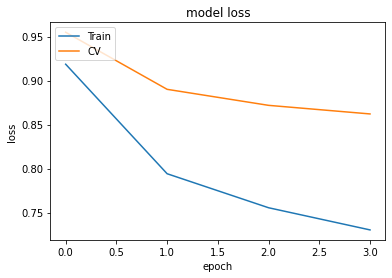

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["Train", "CV"], loc="upper left")
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error as mse

y_pred=model.predict(X_test)[:,0]
y=Y_test.values
print("MSE",mse(y_pred,y))



MSE 0.9093207546094999


In [ ]:
model.save(r"C:\Users\yashn\Desktop\Projects\ML Project Dataset\Project\archive\deeplearning")

INFO:tensorflow:Assets written to: C:\Users\yashn\Desktop\Projects\ML Project Dataset\Project\archive\deeplearning\assets


In [ ]:
model.save(r"C:\Users\yashn\Desktop\Projects\ML Project Dataset\Project\archive\deeplearning1")

INFO:tensorflow:Assets written to: C:\Users\yashn\Desktop\Projects\ML Project Dataset\Project\archive\deeplearning1\assets


##Predicting the best-10 recommendations to the user from the trained model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.python.ops.numpy_ops.np_config as np_config
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

def predict_user(user_id):
    new_model = keras.models.load_model(r"C:\Users\yashn\Desktop\Projects\ML Project Dataset\Project\archive\deeplearning1")
    movies = pd.read_csv(r"C:\Users\yashn\Desktop\Projects\ML Project Dataset\Project\archive\movies_afterupdate.csv",sep=",")
    rated = pd.read_csv(r"C:\Users\yashn\Desktop\Projects\ML Project Dataset\Project\archive\Data_Preprocessed.csv",sep=",")
    rows=movies.shape[0]
    already_seen = rated[rated['userId'] == user_id]['title'].values
    movies.insert(0, 'userId', [user_id] * rows)
    movies_user_model = movies.drop(["Unnamed: 0", "title", "year"] , axis = 1)
    
    #movies_user_model = movies.drop("year", axis = 1)
    movies_user_model = np.asarray(movies_user_model).astype('float32')
    y_pred=new_model.predict(movies_user_model)[:,0]
    best_movies_user = {}
    k=movies['title'].values
    for i in range(len(y_pred)):
        best_movies_user[k[i]] = y_pred[i]
    best_movies_user = dict(sorted(best_movies_user.items(), key=lambda item: item[1],reverse=True))
    best10=[]
    count=0
    for i in best_movies_user:
      if (count>=10)  : 
         break
      elif (i in already_seen):
         continue
      else:
         best10.append([i,best_movies_user[i]])
         count+=1
    return best10

n=int(input("Enter your User-Id: " ))
best10 = predict_user(n)
print("Our Best-10 Recommendations:")
for i in range(10):
    print(str(i+1)+'.', best10[i][0],",Our Score: ",best10[i][1],"/5")





    


Enter your User-Id: 54
Our Best-10 Recommendations:
1. Godfather, The (1972) ,Our Score:  3.719416 /5
2. Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964) ,Our Score:  3.7073967 /5
3. Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981) ,Our Score:  3.7000985 /5
4. Goodfellas (1990) ,Our Score:  3.6849737 /5
5. Star Wars: Episode IV - A New Hope (1977) ,Our Score:  3.67872 /5
6. Fight Club (1999) ,Our Score:  3.6767359 /5
7. Star Wars: Episode V - The Empire Strikes Back (1980) ,Our Score:  3.674738 /5
8. American History X (1998) ,Our Score:  3.6726193 /5
9. Dark Knight, The (2008) ,Our Score:  3.6705427 /5
10. Schindler's List (1993) ,Our Score:  3.6630964 /5


In [ ]:
n=int(input("Enter your User-Id: " ))
best10 = predict_user(n)
print("Our Best-10 Recommendations:")
for i in range(10):
    print(str(i+1)+'.', best10[i][0],",Our Score: ",best10[i][1]," /5")

Enter your User-Id: 87
Our Best-10 Recommendations:
1. Inception (2010) ,Our Score:  3.8535311  /5
2. Memento (2000) ,Our Score:  3.8477464  /5
3. Schindler's List (1993) ,Our Score:  3.8443508  /5
4. Shawshank Redemption, The (1994) ,Our Score:  3.840164  /5
5. Star Wars: Episode IV - A New Hope (1977) ,Our Score:  3.8234906  /5
6. Casablanca (1942) ,Our Score:  3.8234234  /5
7. Departed, The (2006) ,Our Score:  3.8221188  /5
8. Fight Club (1999) ,Our Score:  3.8205788  /5
9. Eternal Sunshine of the Spotless Mind (2004) ,Our Score:  3.819447  /5
10. Godfather, The (1972) ,Our Score:  3.816895  /5


# Saving models

In [ ]:
import pickle

Saving our dataset in the form of dictionary for easy reuseability

In [ ]:
data = {"model1": knn}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

Reloading our saved model 

In [ ]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model1"]

Checking for correctness of the same

In [ ]:
regressor_loaded

NearestNeighbors(algorithm='brute', metric='cosine')

Downloading our model file for easy export

In [ ]:
from google.colab import files
files.download("saved_steps.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>